In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# importing library
from PyPulseHeatPipe import PulseHeatPipe, DataVisualisation

## DI vs Al2O3 40FR 80W

In [12]:
# data loading from already calculated csv files

# data loading for DI Water
csv_file_path_mean_di = "data/di_water_exp/40_FR/combined_mean.csv"
csv_file_path_std_di = "data/di_water_exp/40_FR/combined_std.csv"

df_mean_di = pd.read_csv(csv_file_path_mean_di, index_col=0)
df_std_di = pd.read_csv(csv_file_path_std_di, index_col=0)

# data loading for NF
csv_file_path_mean = "data/al2o3_diwater_exp/40_FR/combined_mean.csv"
csv_file_path_std = "data/al2o3_diwater_exp/40_FR/combined_std.csv"

df_mean_nf = pd.read_csv(csv_file_path_mean, index_col=0)
df_std_nf = pd.read_csv(csv_file_path_std, index_col=0)

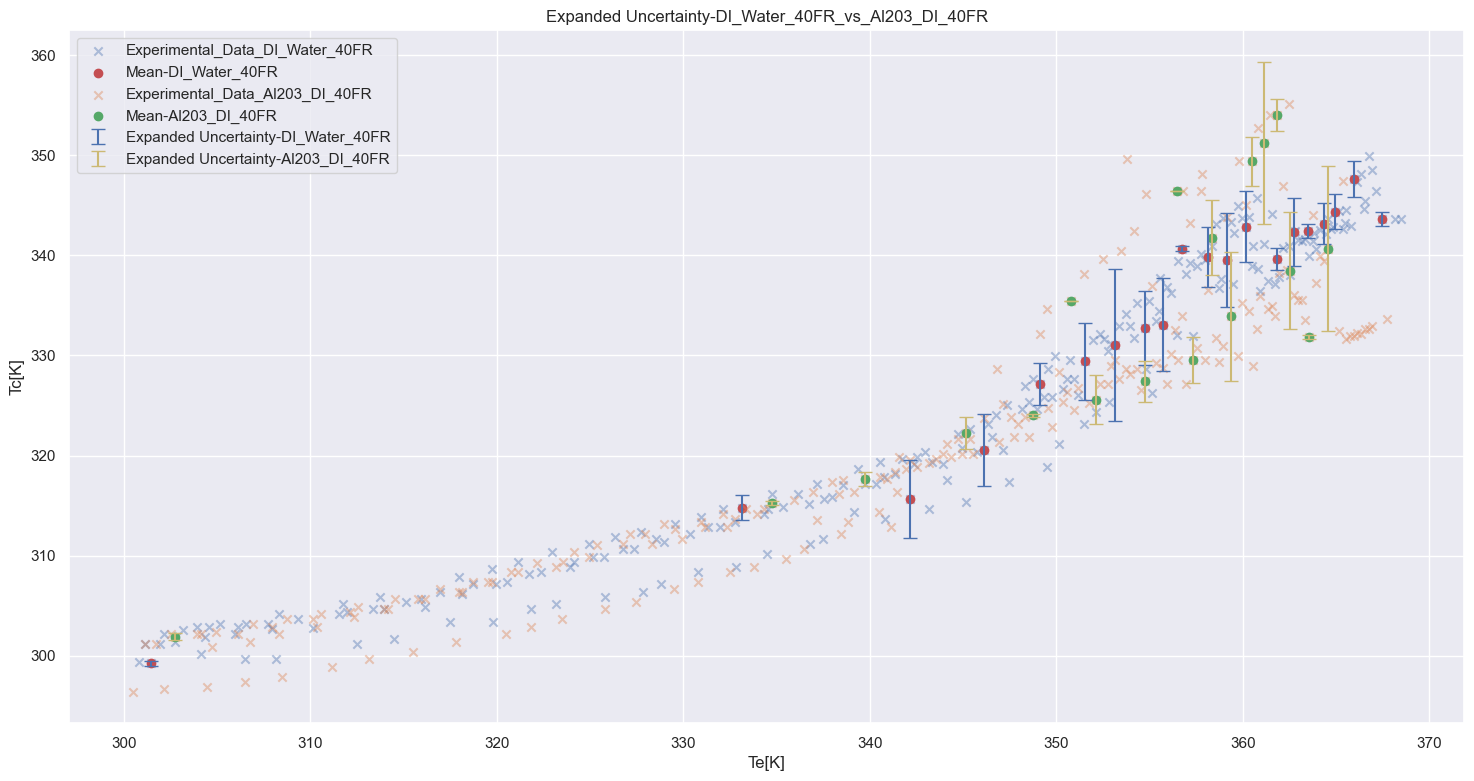

In [22]:
## subploting structure
plt.figure(figsize=(18,9))

# step for data selection 
steps = 5

## defining variable for subplot 2,1,1
x = 'Te[K]'
y = 'Tc[K]'
sample_nf = 'Al203_DI_40FR'
sample_di = 'DI_Water_40FR'

## First plot DIWATER
df_mean = df_mean_di # NOTE: select correct input variable DI Water
df_std = df_std_di

idx = df_std.index
df_mean_idxx = df_mean.loc[idx]

frames=[]
frames_std=[]
for i in range(0, df_mean_idxx.shape[0], steps):
    frames.append(df_mean_idxx.iloc[i, :])
    frames_std.append(df_std.iloc[i, :])
    df_mean_idx = pd.concat(frames, axis=1)
    df_std_ = pd.concat(frames_std, axis=1)
    df_std_ = df_std_.T
    df_mean_idx = df_mean_idx.T
    
plt.scatter(x=df_mean[x], y=df_mean[y], marker="x", alpha=0.4, label=f'Experimental_Data_{sample_di}')
plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='r', label=f"Mean-{sample_di}")
plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='b', capsize=5, label=f"Expanded Uncertainty-{sample_di}")


#NOTE: Plot Overlapping with NANOFluid Sample
df_mean = df_mean_nf # NOTE: select correct input variable NANOFLUID
df_std = df_std_nf

idx = df_std.index
df_mean_idxx = df_mean.loc[idx]

frames=[]
frames_std=[]
for i in range(0, df_mean_idxx.shape[0], steps):
    frames.append(df_mean_idxx.iloc[i, :])
    frames_std.append(df_std.iloc[i, :])
    df_mean_idx = pd.concat(frames, axis=1)
    df_std_ = pd.concat(frames_std, axis=1)
    df_std_ = df_std_.T
    df_mean_idx = df_mean_idx.T

plt.scatter(x=df_mean[x], y=df_mean[y], marker='x', alpha=0.4, label=f'Experimental_Data_{sample_nf}')
plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='g', label=f"Mean-{sample_nf}")
plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='y', capsize=5, label=f"Expanded Uncertainty-{sample_nf}")

plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Expanded Uncertainty-{sample_di}_vs_{sample_nf}")
plt.legend()

plt.savefig(f"data/al2o3_diwater_exp/40_FR/{sample_di}_vs_{sample_nf}.pdf")

In [23]:
def np_plot(steps=5, x:str='Te[K]', y:str='Tc[K]', sample_nf:str = 'Al203_DI_40FR', sample_di:str = 'DI_Water_40FR'):

    ## subploting structure
    plt.figure(figsize=(18,9))

    # step for data selection 
    steps = steps

    ## defining variable for subplot 2,1,1
    x = x
    y = y
    sample_nf = sample_nf
    sample_di = sample_di

    ## First plot DIWATER
    df_mean = df_mean_di # NOTE: select correct input variable DI Water
    df_std = df_std_di

    idx = df_std.index
    df_mean_idxx = df_mean.loc[idx]

    frames=[]
    frames_std=[]
    for i in range(0, df_mean_idxx.shape[0], steps):
        frames.append(df_mean_idxx.iloc[i, :])
        frames_std.append(df_std.iloc[i, :])
        df_mean_idx = pd.concat(frames, axis=1)
        df_std_ = pd.concat(frames_std, axis=1)
        df_std_ = df_std_.T
        df_mean_idx = df_mean_idx.T
        
    plt.scatter(x=df_mean[x], y=df_mean[y], marker="x", alpha=0.4, label=f'Experimental_Data_{sample_di}')
    plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='r', label=f"Mean-{sample_di}")
    plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='b', capsize=5, label=f"Expanded Uncertainty-{sample_di}")


    #NOTE: Plot Overlapping with NANOFluid Sample
    df_mean = df_mean_nf # NOTE: select correct input variable NANOFLUID
    df_std = df_std_nf

    idx = df_std.index
    df_mean_idxx = df_mean.loc[idx]

    frames=[]
    frames_std=[]
    for i in range(0, df_mean_idxx.shape[0], steps):
        frames.append(df_mean_idxx.iloc[i, :])
        frames_std.append(df_std.iloc[i, :])
        df_mean_idx = pd.concat(frames, axis=1)
        df_std_ = pd.concat(frames_std, axis=1)
        df_std_ = df_std_.T
        df_mean_idx = df_mean_idx.T

    plt.scatter(x=df_mean[x], y=df_mean[y], marker='x', alpha=0.4, label=f'Experimental_Data_{sample_nf}')
    plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='g', label=f"Mean-{sample_nf}")
    plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='y', capsize=5, label=f"Expanded Uncertainty-{sample_nf}")

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Expanded Uncertainty-{sample_di}_vs_{sample_nf}")
    plt.legend()

    plt.savefig(f"data/al2o3_diwater_exp/40_FR/{sample_di}_vs_{sample_nf}.pdf")
    return plt.show()

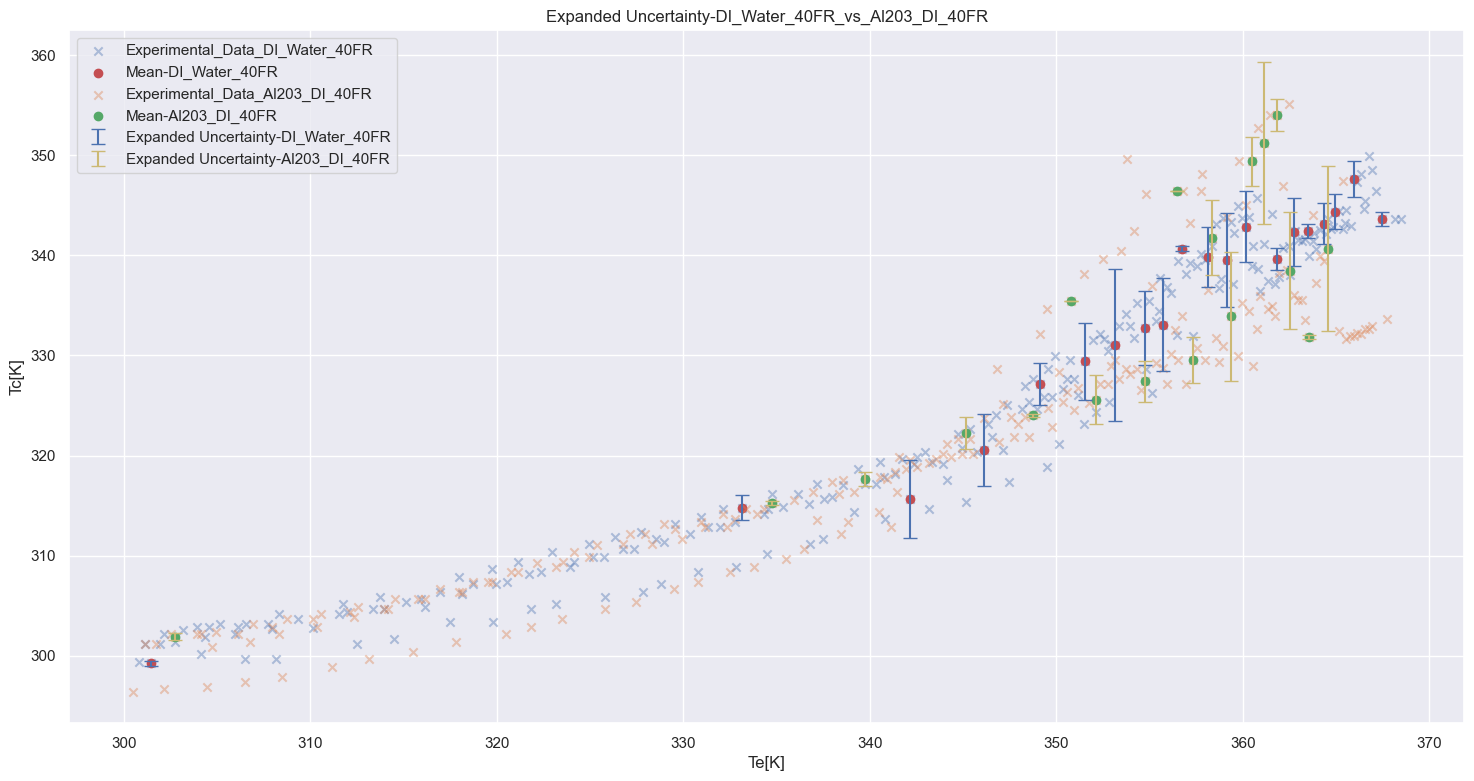

In [26]:
np_plot(steps=5, x='Te[K]', y='Tc[K]', sample_nf = 'Al203_DI_40FR', sample_di = 'DI_Water_40FR')